## **IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv('/content/DRUGS  SIDE EFFECTS DATASET.csv')
data.head()

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,Aaban,M,topamax,41.0,White,Mild Side Effects
1,Aaban,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,Aabha,F,tazorac,31.0,White,Mild Side Effects
3,Aabha,F,voltaren,44.0,White,Severe Side Effects
4,Aabid,M,tramadol,24.0,White,No Side Effects


In [ ]:
# Check for rows with all the features having the same values
same_values_rows = data[data.duplicated(keep=False) & data.apply(lambda x: x.nunique() == 1, axis=1)]

# Print the rows with all the features having the same values
print("Rows with Same Values in All Features:")
print(same_values_rows)

Rows with Same Values in All Features:
Empty DataFrame
Columns: [NAME, GENDER, DRUG NAME, AGE, RACE, SIDE EFFECTS]
Index: []


## **EDA**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   NAME          400000 non-null  object 
 1   GENDER        400000 non-null  object 
 2   DRUG NAME     400000 non-null  object 
 3   AGE           399980 non-null  float64
 4   RACE          400000 non-null  object 
 5   SIDE EFFECTS  400000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 18.3+ MB


In [ ]:
data.shape

(400000, 6)

In [ ]:
data.head(10).style.background_gradient(cmap = 'ocean')

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,Aaban,M,topamax,41.000000,White,Mild Side Effects
1,Aaban,M,zocor,53.000000,"Hispanic, White",Extremely Severe Side Effects
2,Aabha,F,tazorac,31.000000,White,Mild Side Effects
3,Aabha,F,voltaren,44.000000,White,Severe Side Effects
4,Aabid,M,tramadol,24.000000,White,No Side Effects
5,Aabida,F,valtrex,55.000000,"Hispanic, White",No Side Effects
6,Aabidah,F,levoxyl,34.000000,White,No Side Effects
7,Aabigail,F,imitrex,28.000000,White,Moderate Side Effects
8,Aabir,M,seroquel,38.000000,White,Mild Side Effects
9,Aabir,M,minocycline,56.000000,White,No Side Effects


In [ ]:
data.describe().style.background_gradient(cmap = 'copper')

,AGE
count,399980.000000
mean,41.466513
std,12.550773
min,14.000000
25%,31.000000
50%,41.000000
75%,51.000000
max,600.000000


In [ ]:
data.isna().sum()

NAME             0
GENDER           0
DRUG NAME        0
AGE             20
RACE             0
SIDE EFFECTS     0
dtype: int64

In [ ]:
data.nunique()

NAME            133911
GENDER               2
DRUG NAME          502
AGE                 80
RACE                 9
SIDE EFFECTS         5
dtype: int64

# **PLOTS**

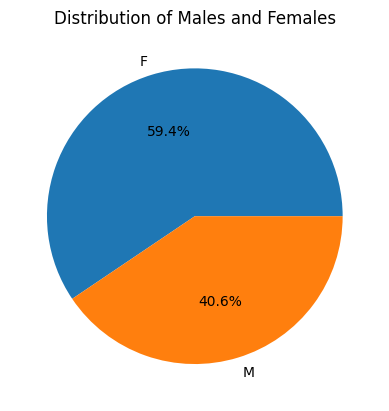

In [ ]:
gender_counts = data['GENDER'].value_counts()

# Create a pie chart
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')

# Add title
plt.title('Distribution of Males and Females')

# Display the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

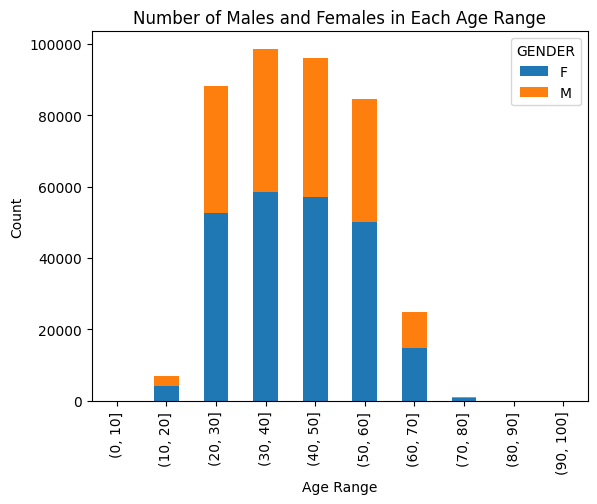

In [ ]:
age_ranges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Categorize the ages into the defined ranges
data['Age Range'] = pd.cut(data['AGE'], bins=age_ranges)

# Group the data by age range and gender, and count the number of occurrences
grouped_data = data.groupby(['Age Range', 'GENDER']).size().unstack()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a stacked bar plot
ax = grouped_data.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Number of Males and Females in Each Age Range')

# Display the plot
plt.show()

In [ ]:
data['Age Range'] = pd.cut(data['AGE'], bins=age_ranges).astype(str)

# Group the data by age range and gender, and count the number of occurrences
grouped_data = data.groupby(['Age Range', 'GENDER']).size().unstack()

# Create a stacked bar plot using Plotly
fig = go.Figure()

# Add bars for males and females in each age range
for col in grouped_data.columns:
    fig.add_trace(go.Bar(x=grouped_data.index, y=grouped_data[col], name=col,
                         text=grouped_data[col], textposition='auto'))

# Update the layout of the figure
fig.update_layout(barmode='stack', xaxis_title='Age Range', yaxis_title='Count',
                  title='Number of Males and Females in Each Age Range')

# Display the plot
fig.show()

In [ ]:
# Count the number of occurrences for each side effect
side_effect_counts = data['SIDE EFFECTS'].value_counts()
print(side_effect_counts)

Mild Side Effects                133236
No Side Effects                  115761
Moderate Side Effects             74509
Severe Side Effects               53452
Extremely Severe Side Effects     23042
Name: SIDE EFFECTS, dtype: int64


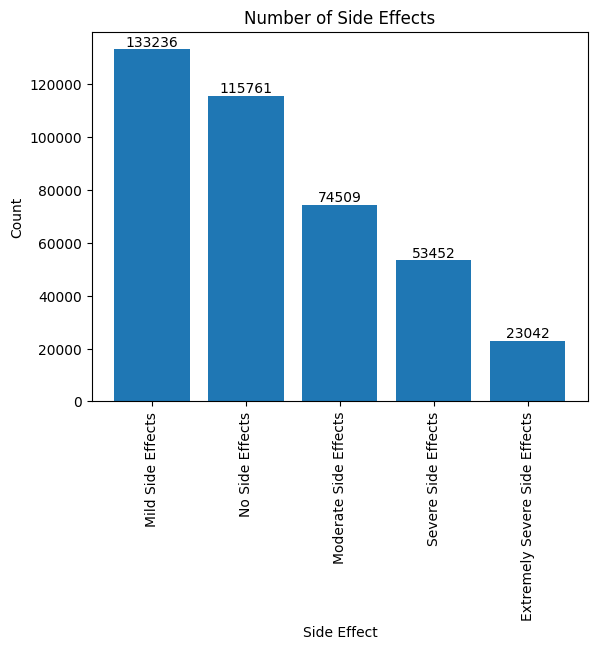

In [ ]:
plt.bar(side_effect_counts.index, side_effect_counts.values)

# Add labels and title
plt.xlabel('Side Effect')
plt.ylabel('Count')
plt.title('Number of Side Effects')

# Rotate x-axis labels if needed
plt.xticks(rotation='vertical')

# Add number labels on top of each bar
for i, v in enumerate(side_effect_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Display the plot
plt.show()

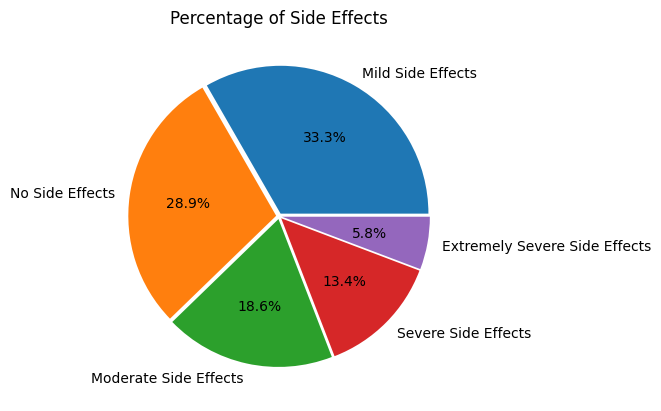

In [ ]:
side_effect_counts = data['SIDE EFFECTS'].value_counts()

# Calculate the percentage values
total_count = side_effect_counts.sum()
percentage_values = (side_effect_counts / total_count) * 100

# Create a list of explode values to add space between categories
explode = [0.02] * len(percentage_values)  # Adjust the value (0.05) for the desired amount of space

# Create a pie chart with explode parameter
plt.pie(percentage_values, labels=percentage_values.index, autopct='%1.1f%%', explode=explode)

# Add title
plt.title('Percentage of Side Effects')

# Display the plot
plt.show()

In [ ]:
# Count the number of occurrences for each race
race_counts = data['RACE'].value_counts()

# Print the number of each race
print(race_counts)


White              314074
Hispanic, White     44072
Black               35845
Unknown              3046
Hispanic, Black      1673
Other                1010
Asian, Other          168
Asian Indian          104
Chinese                 8
Name: RACE, dtype: int64


In [ ]:
fig = go.Figure(data=[go.Bar(x=race_counts.index, y=race_counts.values,
                            text=race_counts.values, textposition='auto')])

# Add labels and title
fig.update_layout(xaxis_title='Race', yaxis_title='Count', title='Number of People by Race')

# Rotate x-axis labels if needed
fig.update_layout(xaxis_tickangle=-45)

# Display the plot
fig.show()

In [ ]:
# Group the data by race and gender and count the occurrences
grouped_data = data.groupby(['RACE', 'GENDER']).size().unstack().fillna(0)

# Create a grouped bar plot using Plotly
fig = go.Figure(data=[
    go.Bar(name='Male', x=grouped_data.index, y=grouped_data['M'], text=grouped_data['M'], textposition='auto'),
    go.Bar(name='Female', x=grouped_data.index, y=grouped_data['F'], text=grouped_data['F'], textposition='auto')
])

# Add labels and title
fig.update_layout(xaxis_title='Race', yaxis_title='Count', title='Number of People by Race and Gender')

# Rotate x-axis labels if needed
fig.update_layout(xaxis_tickangle=-45)

# Display the plot
fig.show()

<Figure size 1000x600 with 0 Axes>

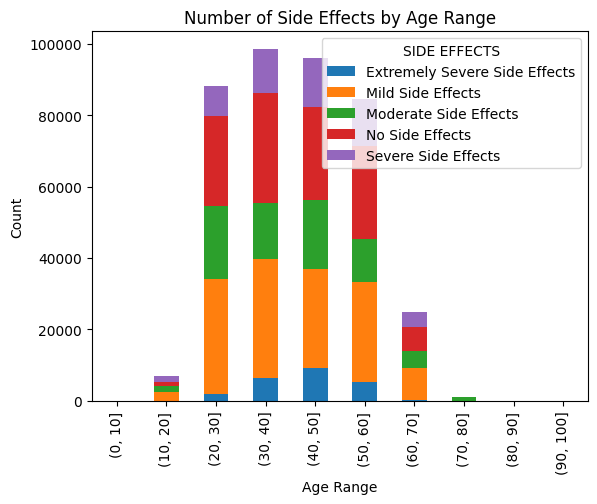

In [ ]:
age_ranges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Categorize the ages into the defined ranges
data['Age Range'] = pd.cut(data['AGE'], bins=age_ranges)

# Group the data by age range and side effects, and count the number of occurrences
grouped_data = data.groupby(['Age Range', 'SIDE EFFECTS']).size().unstack()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a stacked bar plot
ax = grouped_data.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Number of Side Effects by Age Range')

# Rotate x-axis labels if needed
plt.xticks(rotation='vertical')

# Display the plot
plt.show()

In [ ]:
data['Age Range'] = pd.cut(data['AGE'], bins=age_ranges)

# Group the data by age range and count the number of occurrences
grouped_data = data['Age Range'].value_counts().sort_index()

# Create a bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=grouped_data.index.astype(str), y=grouped_data.values)])

# Add labels and title
fig.update_layout(xaxis_title='Age Range', yaxis_title='Count', title='Number of People in Each Age Range')

# Add count numbers on top of each bar
fig.update_traces(text=grouped_data.values, textposition='auto')

# Rotate x-axis labels if needed
fig.update_layout(xaxis_tickangle=-45)

# Display the plot
fig.show()

In [ ]:
data['Age Range'] = data['Age Range'].astype(str)

# Group the data by age range and side effects, and count the number of occurrences
grouped_data = data.groupby(['Age Range', 'SIDE EFFECTS']).size().unstack()

# Calculate the percentage values
row_sums = grouped_data.sum(axis=1)
percentage_data = grouped_data.div(row_sums, axis=0) * 100

# Create a stacked bar plot using Plotly
fig = go.Figure()

# Add bars for each side effect in each age range with percentage values
for col in percentage_data.columns:
    fig.add_trace(go.Bar(x=percentage_data.index, y=percentage_data[col], name=col))

# Update the layout of the figure
fig.update_layout(barmode='stack', xaxis_title='Age Range', yaxis_title='Percentage',
                  title='Percentage of Side Effects by Age Range')

# Rotate x-axis labels if needed
fig.update_layout(xaxis_tickangle=-45)

# Display the plot
fig.show()

In [ ]:
grouped_data = data.groupby(['RACE', 'SIDE EFFECTS']).size().unstack()

# Calculate the total counts for each race
total_counts = grouped_data.sum(axis=1)

# Calculate the percentage values for each side effect in each race
percentage_values = grouped_data.div(total_counts, axis=0) * 100

# Create a stacked bar plot using Plotly
fig = go.Figure()

# Add bars for each side effect in each race with percentage values
for col in percentage_values.columns:
    fig.add_trace(go.Bar(x=percentage_values.index, y=percentage_values[col], name=col))

# Update the layout of the figure
fig.update_layout(barmode='stack', xaxis_title='Race', yaxis_title='Percentage',
                  title='Percentage of Side Effects by Race')

# Rotate x-axis labels if needed
fig.update_layout(xaxis_tickangle=-45)

# Display the plot
fig.show()

In [ ]:
grouped_data = data.groupby(['DRUG NAME', 'SIDE EFFECTS']).size().unstack()

# Create a grouped bar plot using Plotly
fig = go.Figure()

# Add bars for each side effect in each drug name
for col in grouped_data.columns:
    fig.add_trace(go.Bar(x=grouped_data.index, y=grouped_data[col], name=col))

# Update the layout of the figure
fig.update_layout(barmode='group', xaxis_title='Drug Name', yaxis_title='Count',
                  title='Number of Side Effects by Drug Name')

# Rotate x-axis labels if needed
fig.update_layout(xaxis_tickangle=-45)

# Display the plot
fig.show()

In [ ]:
grouped_data = data.groupby(['DRUG NAME', 'SIDE EFFECTS']).size().unstack()

# Calculate the percentage values
total_count = grouped_data.sum(axis=1)
percentage_values = (grouped_data.T / total_count * 100).T

# Create a grouped bar plot using Plotly
fig = go.Figure()

# Add bars for each side effect in each drug name
for col in percentage_values.columns:
    fig.add_trace(go.Bar(x=percentage_values.index, y=percentage_values[col], name=col))

# Update the layout of the figure
fig.update_layout(barmode='group', xaxis_title='Drug Name', yaxis_title='Percentage',
                  title='Percentage of Side Effects by Drug Name')

# Rotate x-axis labels if needed
fig.update_layout(xaxis_tickangle=-45)

# Update y-axis ticks and labels to display percentages
fig.update_yaxes(ticksuffix='%')

# Display the plot
fig.show()

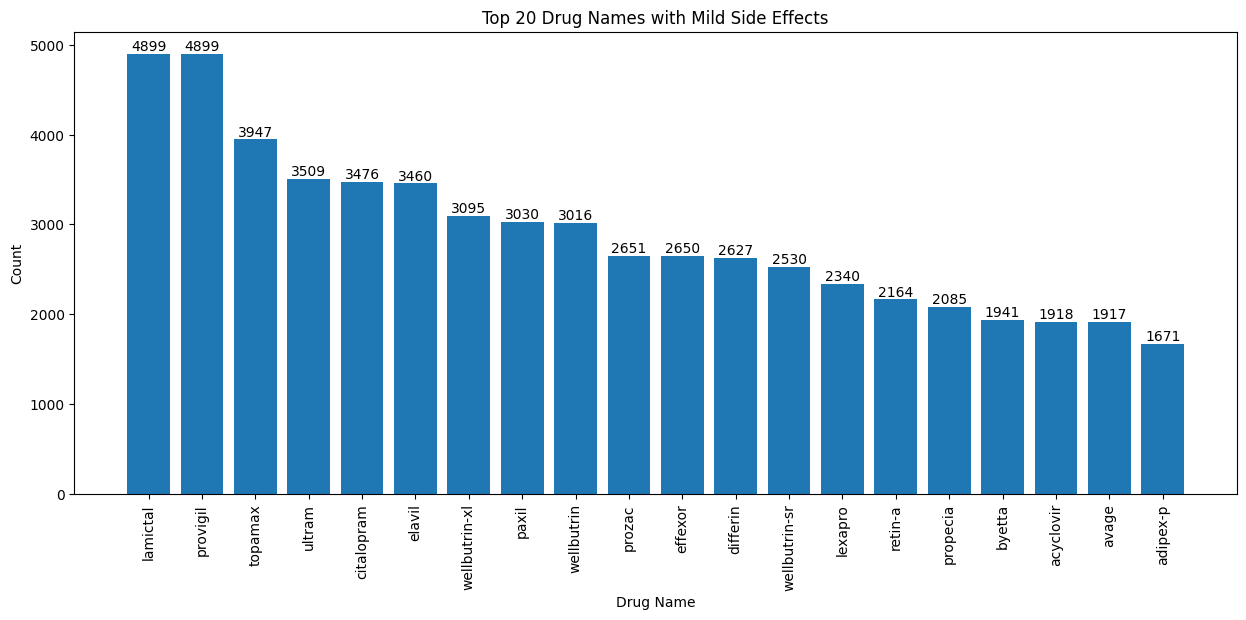

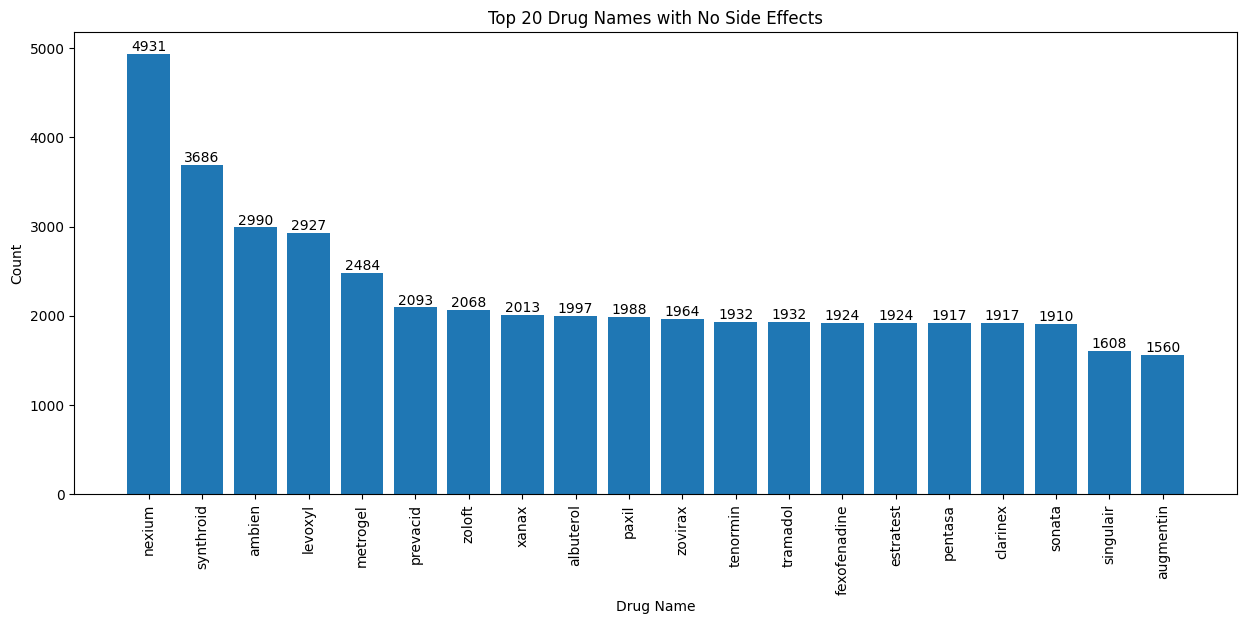

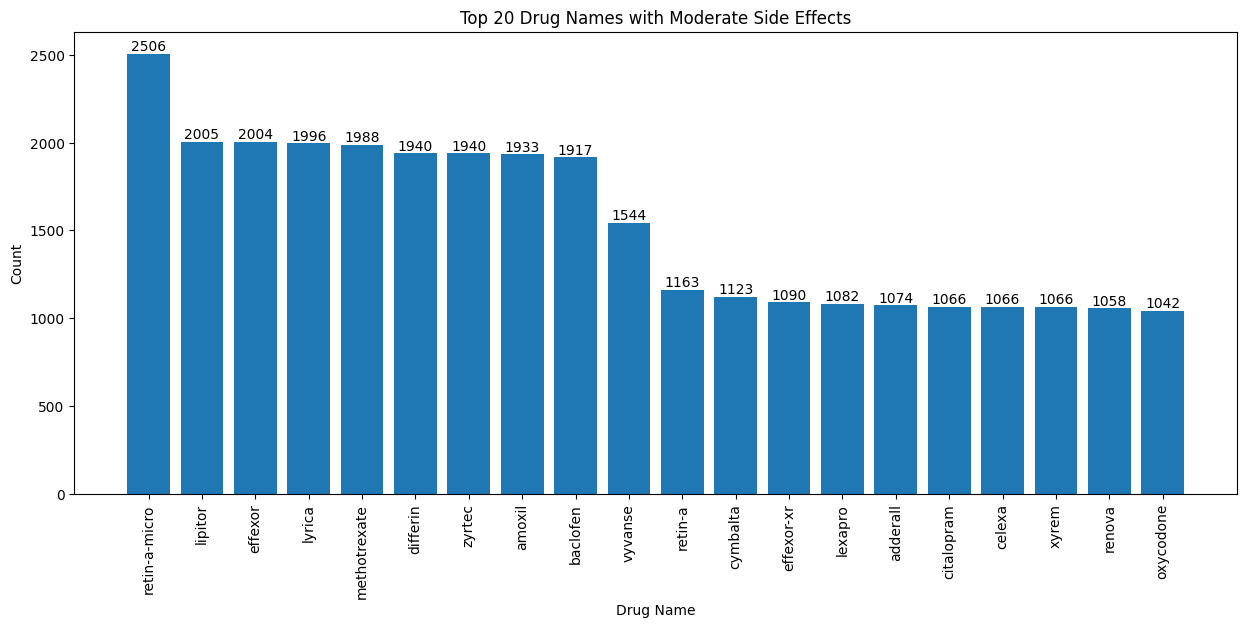

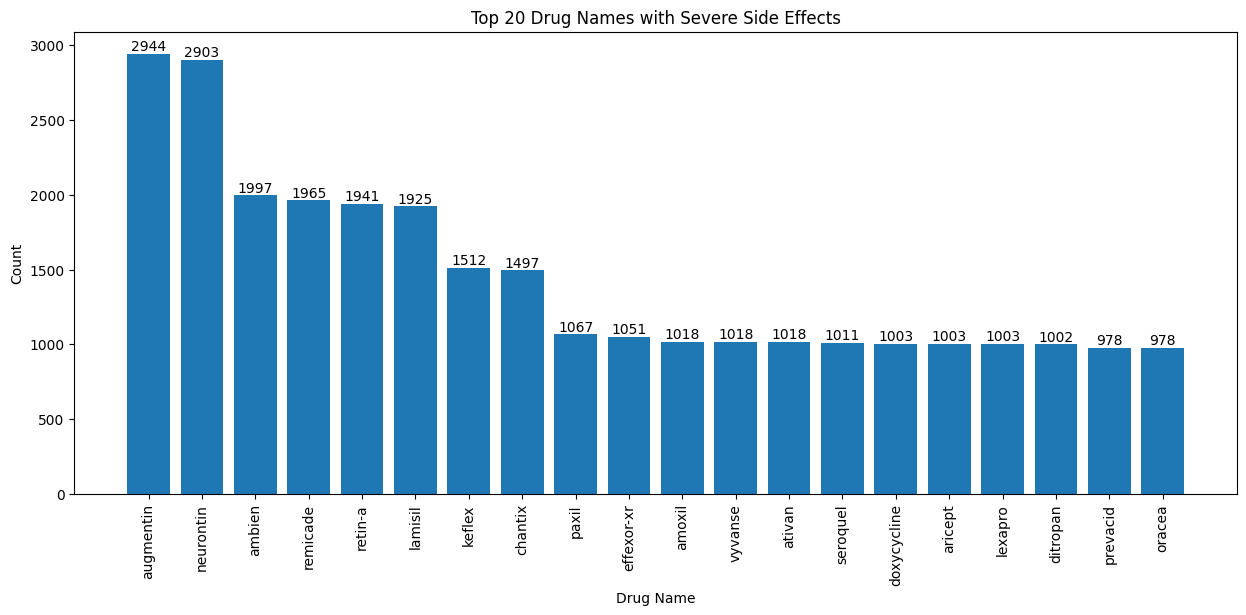

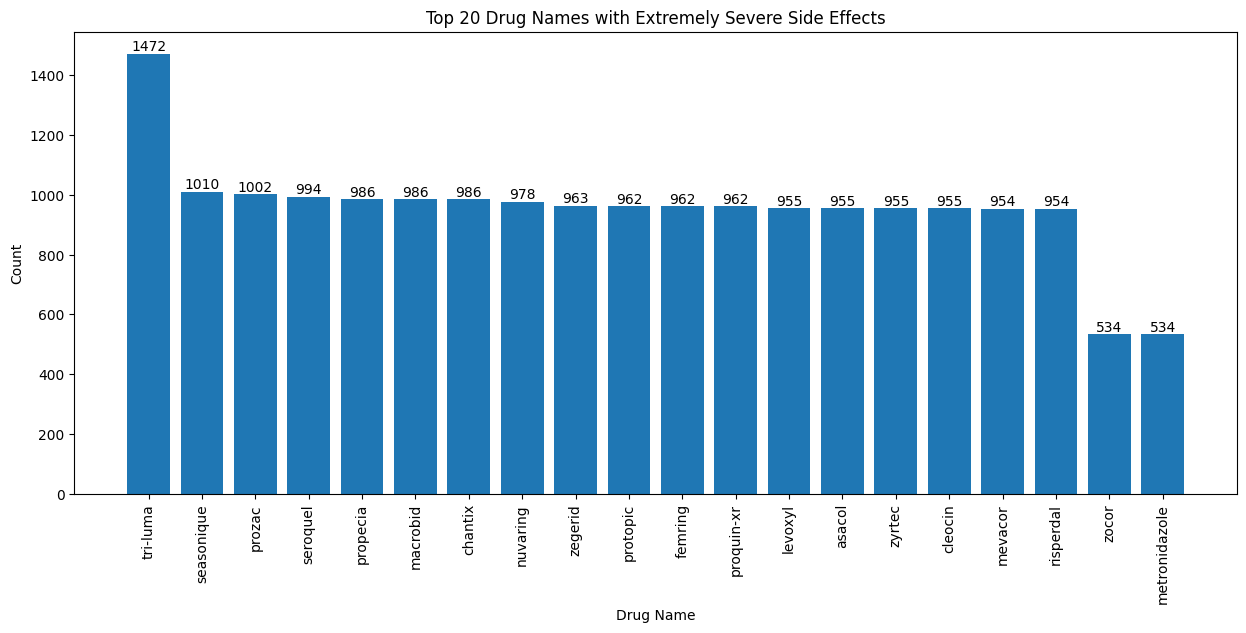

In [ ]:
# Define the side effect categories
side_effect_categories = ['Mild Side Effects', 'No Side Effects', 'Moderate Side Effects', 'Severe Side Effects', 'Extremely Severe Side Effects']

# Iterate over each side effect category
for category in side_effect_categories:
    # Filter the data for the specific side effect category
    filtered_data = data[data['SIDE EFFECTS'] == category]

    # Count the occurrences of each drug name
    drug_counts = filtered_data['DRUG NAME'].value_counts()

    # Sort the drug names based on the counts
    sorted_drugs = drug_counts.sort_values(ascending=False)

    # Select the top 20 drug names
    top_20_drugs = sorted_drugs.head(20)

    # Create a bar plot to display the top 20 drug names
    plt.figure(figsize=(15, 6))
    plt.bar(top_20_drugs.index, top_20_drugs.values)

    # Add labels and title
    plt.xlabel('Drug Name')
    plt.ylabel('Count')
    plt.title(f'Top 20 Drug Names with {category}')

    # Rotate x-axis labels if needed
    plt.xticks(rotation='vertical')

    # Add count values on top of each bar
    for i, value in enumerate(top_20_drugs.values):
        plt.text(i, value, str(value), ha='center', va='bottom')

    # Display the plot
    plt.show()

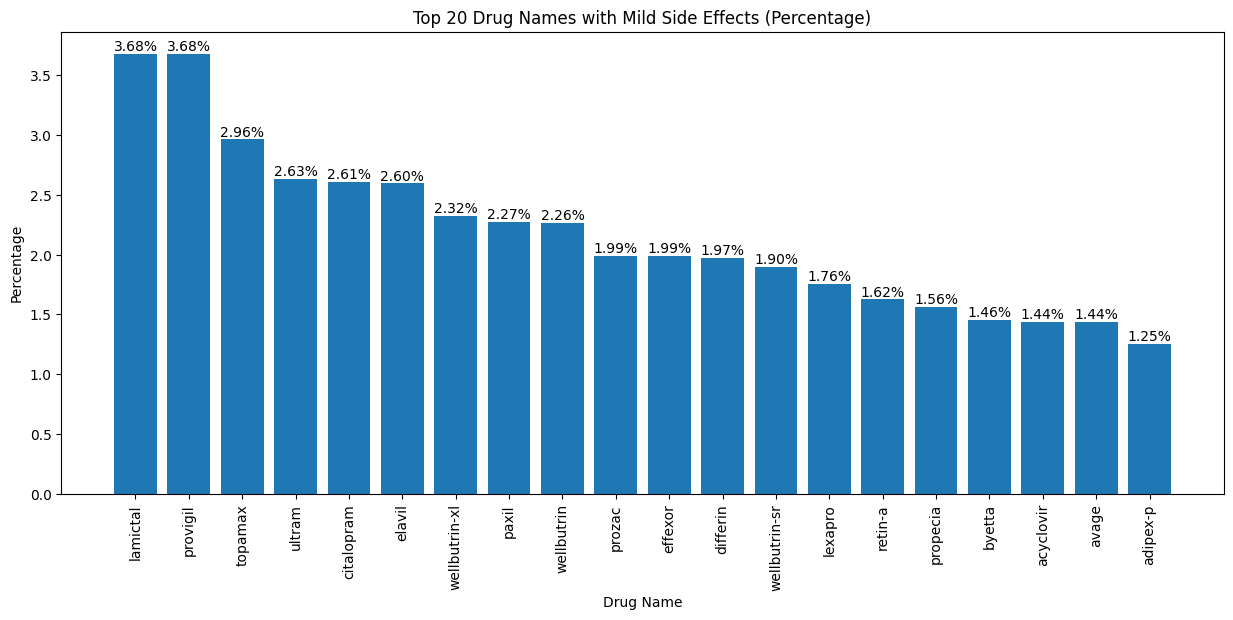

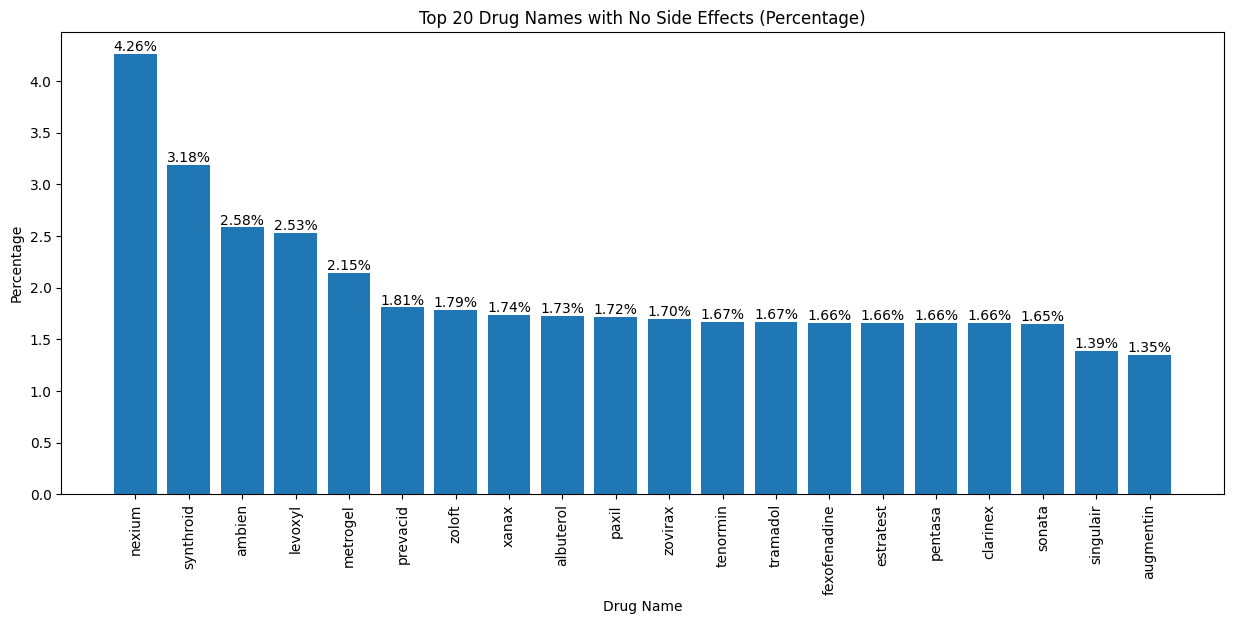

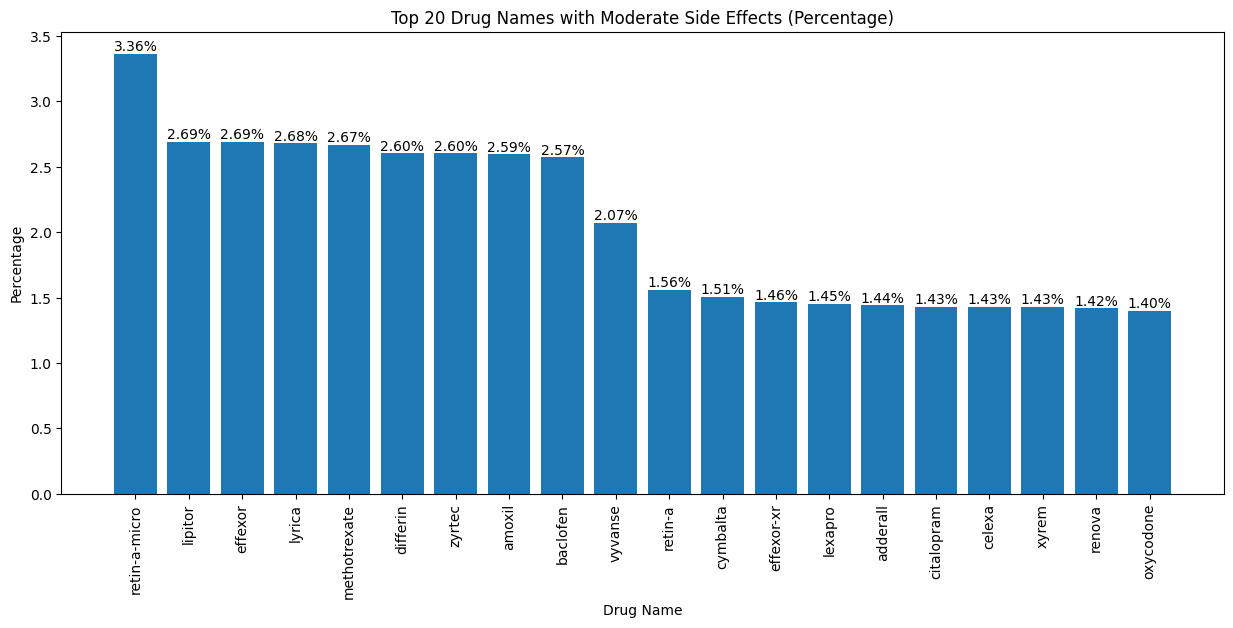

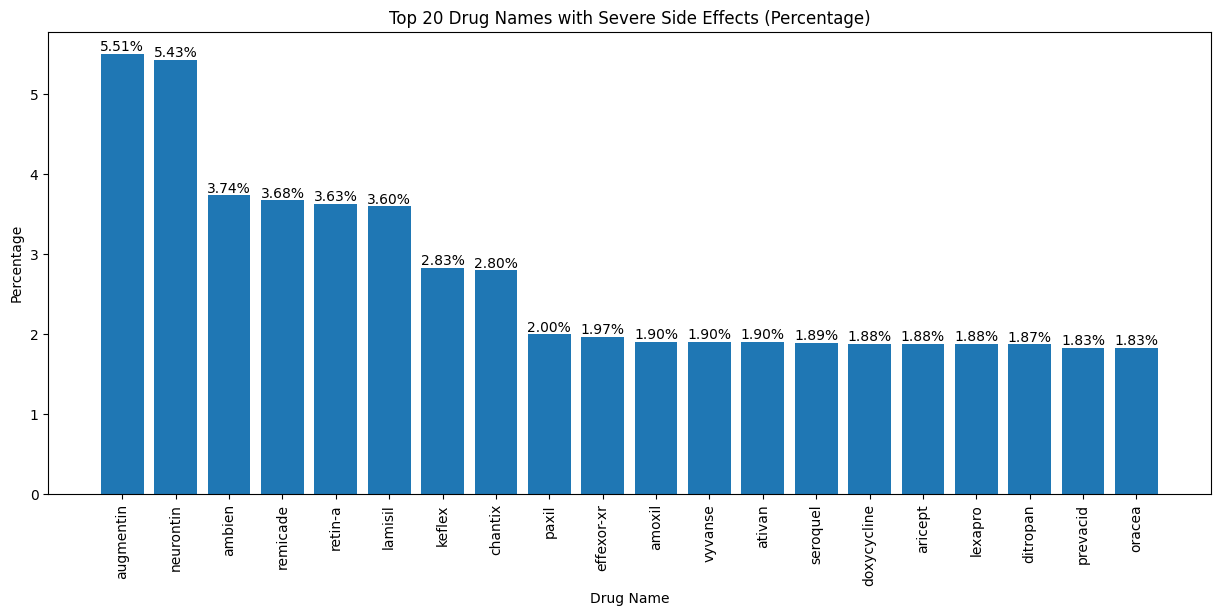

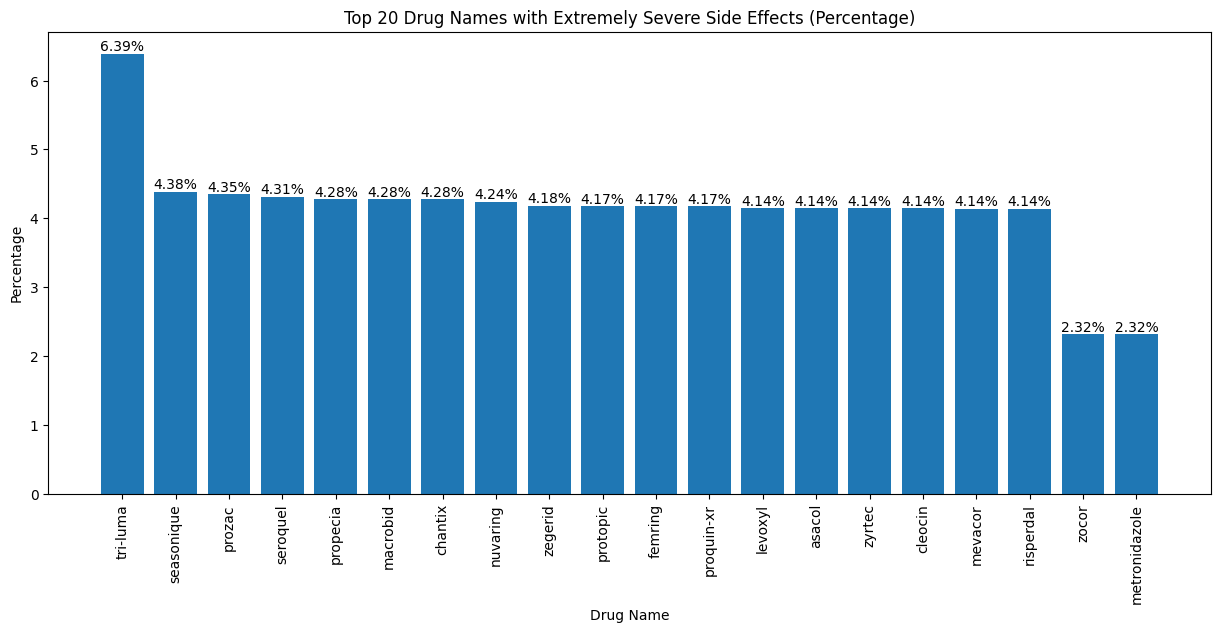

In [ ]:
for category in side_effect_categories:
    # Filter the data for the specific side effect category
    filtered_data = data[data['SIDE EFFECTS'] == category]

    # Count the occurrences of each drug name
    drug_counts = filtered_data['DRUG NAME'].value_counts()

    # Sort the drug names based on the counts
    sorted_drugs = drug_counts.sort_values(ascending=False)

    # Select the top 50 drug names
    top_20_drugs = sorted_drugs.head(20)

    # Calculate the percentage for each drug
    total_count = drug_counts.sum()
    drug_percentages = (drug_counts[top_20_drugs.index] / total_count) * 100

    # Create a bar plot to display the top 20 drug names with percentages
    plt.figure(figsize=(15, 6))
    plt.bar(top_20_drugs.index, drug_percentages)

    # Add labels and title
    plt.xlabel('Drug Name')
    plt.ylabel('Percentage')
    plt.title(f'Top 20 Drug Names with {category} (Percentage)')

    # Rotate x-axis labels if needed
    plt.xticks(rotation='vertical')

    # Add percentage values on top of each bar
    for i, value in enumerate(drug_percentages):
        plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

    # Display the plot
    plt.show()

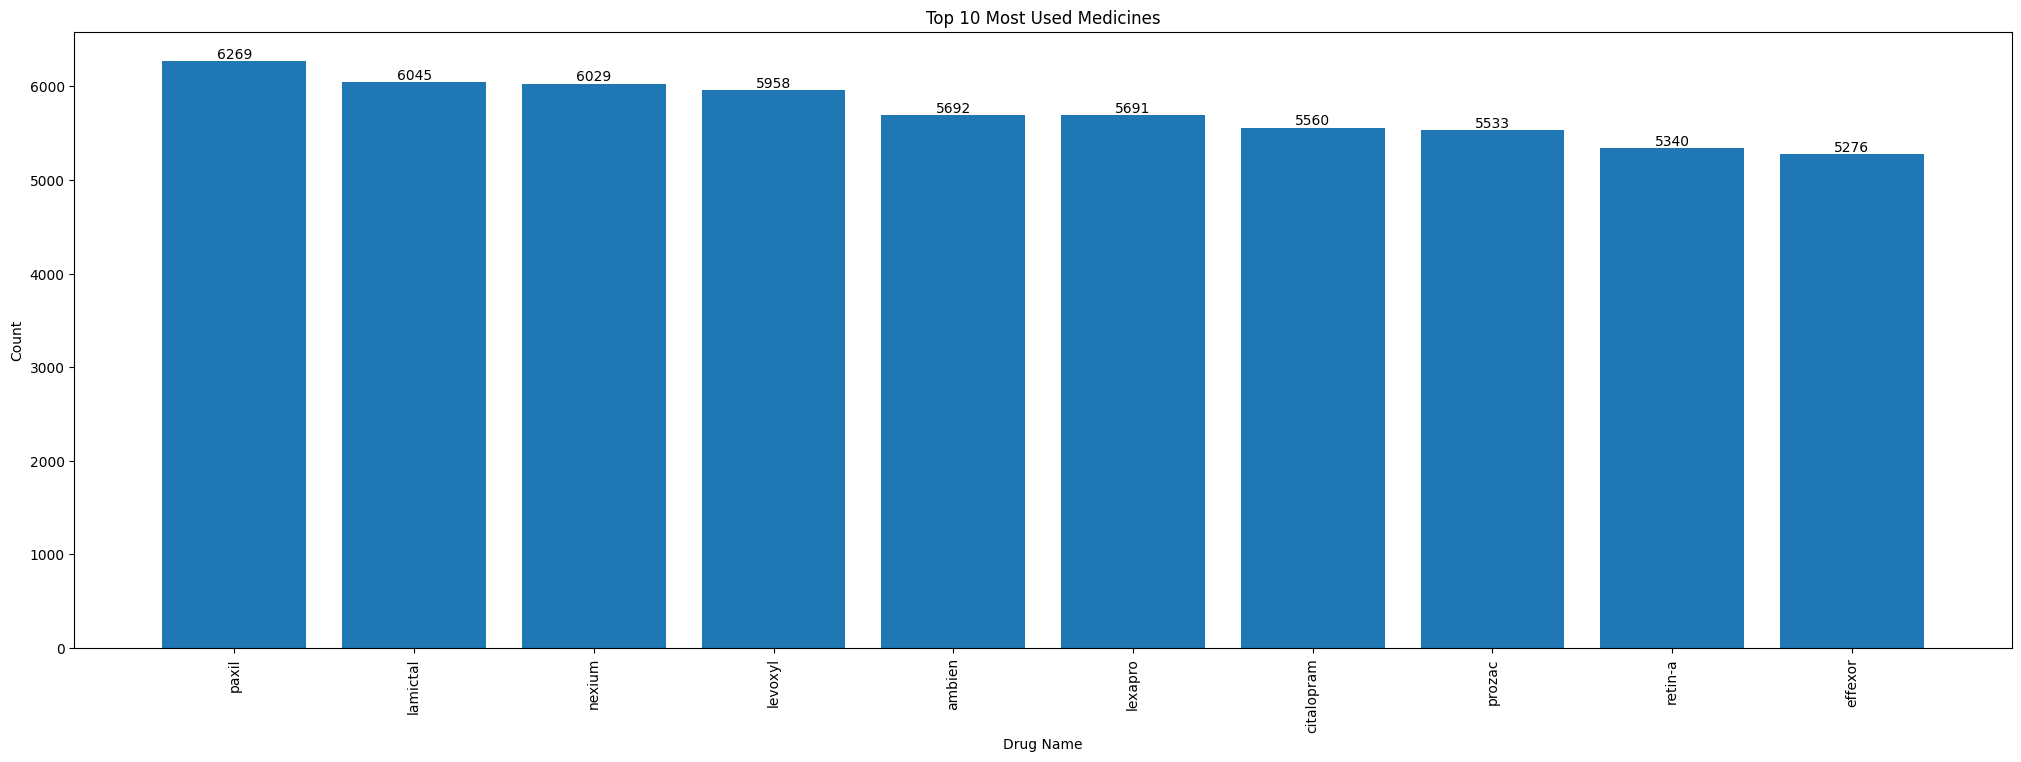

In [ ]:
drug_counts = data['DRUG NAME'].value_counts()

# Sort the drug names based on the counts
sorted_drugs = drug_counts.sort_values(ascending=False)

# Select the top 50 drug names
top_10_drugs = sorted_drugs.head(10)

# Create a bar plot to display the top 20 drug names
plt.figure(figsize=(25, 8))
plt.bar(top_10_drugs.index, top_10_drugs.values)

# Add labels and title
plt.xlabel('Drug Name')
plt.ylabel('Count')
plt.title('Top 10 Most Used Medicines')

# Rotate x-axis labels if needed
plt.xticks(rotation='vertical')

# Add count values on top of each bar
for i, value in enumerate(top_10_drugs.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Display the plot
plt.show()

# **PREPROCESSING**

In [ ]:
data = data.drop('Age Range', axis=1)

In [ ]:
# Filter out ages outside the range of 100
filtered_data = data[data['AGE'] > 90]
print(len(filtered_data))


19


In [ ]:
# Print the output
filtered_data.head(20)

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
3008,Adaleen,F,biaxin,300.0,White,Severe Side Effects
41048,Bay,M,retin-a-micro,302.0,Black,Moderate Side Effects
66169,Charlotta,F,macrobid,500.0,White,Extremely Severe Side Effects
85047,Danyal,F,macrobid,400.0,White,Extremely Severe Side Effects
111850,Elizabeth,F,claritin,203.0,White,Severe Side Effects
119574,Ernie,M,wellbutrin,160.0,Black,Mild Side Effects
127240,Felicidad,F,ambien,400.0,Other,No Side Effects
171643,Javori,M,augmentin,191.0,"Hispanic, White",Severe Side Effects
174039,Jearld,M,cymbalta,450.0,White,Extremely Severe Side Effects
174487,Jehonadab,M,citalopram,390.0,White,Moderate Side Effects


In [ ]:
data['AGE'] = data['AGE'].astype(str)

# Check the length of each entry and reduce the value in the ones place for entries with three digits
data['AGE'] = data['AGE'].apply(lambda x: x[:-1] if len(x) == 3 else x)

# Convert the 'AGE' column to numeric values and fill NaN values with zero
data['AGE'] = pd.to_numeric(data['AGE'], errors='coerce').fillna(0).astype(int)


In [ ]:
data

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,Aaban,M,topamax,41,White,Mild Side Effects
1,Aaban,M,zocor,53,"Hispanic, White",Extremely Severe Side Effects
2,Aabha,F,tazorac,31,White,Mild Side Effects
3,Aabha,F,voltaren,44,White,Severe Side Effects
4,Aabid,M,tramadol,24,White,No Side Effects
...,...,...,...,...,...,...
399995,TRUE,M,lamisil,50,White,Severe Side Effects
399996,TRUE,M,klaron,55,"Hispanic, White",No Side Effects
399997,TRUE,M,celexa,57,Other,Severe Side Effects
399998,TRUE,F,zoloft,59,White,No Side Effects


In [ ]:
data.isnull().sum()

NAME            0
GENDER          0
DRUG NAME       0
AGE             0
RACE            0
SIDE EFFECTS    0
dtype: int64

# **ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import HashingVectorizer

# Drop the 'NAME' column
data = data.drop('NAME', axis=1)

# Encode Categorical Variables
label_encoder = LabelEncoder()
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])
data['RACE'] = label_encoder.fit_transform(data['RACE'])
data['SIDE EFFECTS'] = label_encoder.fit_transform(data['SIDE EFFECTS'])

# Convert the 'DRUG NAME' column to a list of strings
drug_names = data['DRUG NAME'].tolist()

# Initialize the HashingVectorizer with the desired number of dimensions
hashing_vectorizer = HashingVectorizer(n_features=10, alternate_sign=False)

# Transform the drug names using the HashingVectorizer
hashed_features = hashing_vectorizer.transform(drug_names)

# Convert the hashed features to a dense NumPy array
hashed_features_array = hashed_features.toarray()

# Create a DataFrame with the hashed features
hashed_features_df = pd.DataFrame(hashed_features_array, columns=['DRUG_NAME_HASH_{}'.format(i+1) for i in range(10)])

# Concatenate the hashed features with the original data
data_encoded = pd.concat([data.drop('DRUG NAME', axis=1), hashed_features_df], axis=1)

In [ ]:
# Feature Selection (example: using correlation analysis)
correlation_matrix = data.corr()

In [ ]:
correlation_matrix

,GENDER,AGE,RACE,SIDE EFFECTS
GENDER,1.000000,0.001379,0.000640,-0.000975
AGE,0.001379,1.000000,-0.167983,0.031847
RACE,0.000640,-0.167983,1.000000,-0.003321
SIDE EFFECTS,-0.000975,0.031847,-0.003321,1.000000


In [ ]:
data_encoded.head()

,GENDER,AGE,RACE,SIDE EFFECTS,DRUG_NAME_HASH_1,DRUG_NAME_HASH_2,DRUG_NAME_HASH_3,DRUG_NAME_HASH_4,DRUG_NAME_HASH_5,DRUG_NAME_HASH_6,DRUG_NAME_HASH_7,DRUG_NAME_HASH_8,DRUG_NAME_HASH_9,DRUG_NAME_HASH_10
0,1,41,8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,53,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,31,8,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,44,8,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,24,8,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Split the data into features (X) and target (y)
X = data_encoded.drop('SIDE EFFECTS', axis=1)
y = data_encoded['SIDE EFFECTS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **MODEL BUILDING**

In [ ]:
# Build the random forest classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.68      0.67      4552
           1       0.87      0.89      0.88     26672
           2       0.84      0.77      0.80     15068
           3       0.85      0.86      0.85     23070
           4       0.80      0.82      0.81     10638

    accuracy                           0.84     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.84      0.84      0.84     80000



In [ ]:
model = KNeighborsClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.69      0.68      4552
           1       0.86      0.87      0.87     26672
           2       0.78      0.81      0.79     15068
           3       0.86      0.83      0.85     23070
           4       0.81      0.79      0.80     10638

    accuracy                           0.83     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.83      0.83      0.83     80000



In [ ]:
model = GradientBoostingClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.72      0.37      0.49      4552
           1       0.65      0.83      0.73     26672
           2       0.69      0.57      0.62     15068
           3       0.72      0.73      0.72     23070
           4       0.79      0.56      0.65     10638

    accuracy                           0.69     80000
   macro avg       0.71      0.61      0.64     80000
weighted avg       0.70      0.69      0.68     80000



In [ ]:
# Build the Logistic Regression classifier model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4552
           1       0.36      0.60      0.45     26672
           2       0.36      0.15      0.21     15068
           3       0.40      0.52      0.45     23070
           4       0.50      0.00      0.00     10638

    accuracy                           0.38     80000
   macro avg       0.32      0.25      0.22     80000
weighted avg       0.37      0.38      0.32     80000



# **HYPER** PARAMETER TUNING

In [44]:
param_grid = {
    'n_estimators': np.arange(100, 501, 100),
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': np.arange(2, 11, 2),
    'min_samples_leaf': np.arange(1, 11, 2),
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}
# Create the model
model = RandomForestClassifier(random_state=42)

# Create RandomizedSearchCV instance
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=50, cv=5, random_state=42, n_jobs=-1)

# Fit the random search to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = random_search.best_params_
best_score = random_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}
Best Score: 0.83445625


For min_samples_split, you are generating a sequence starting from 2, increasing by steps of 2, up to (but not including) 11. This results in the sequence [2, 4, 6, 8, 10].

For min_samples_leaf, you are generating a sequence starting from 1, increasing by steps of 2, up to (but not including) 11. This results in the sequence [1, 3, 5, 7, 9]


## Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}
Best Score: 0.83445625

# **CONCLUSION**

*Selected RANDOM FORREST CLASSIFIER since it gave better scores with an average accuracy,  precision, recall, f1-score (84%)*